# Results R: How do sentiment, topic and socials correlate with each other and with demographic variables?

## Multilevel (i.e., random effects) models clustering on docauthorid

## Resources

In [4]:
# Get Packages & Libraries
library(tidyverse)
library(brms)
library(ggridges)
library(tidybayes)
library(bayesplot)

In [5]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

unfactorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

st <- function(x){
    (x-mean(x,na.rm=TRUE))/sd(x,na.rm=TRUE)
}

In [6]:
# View Data
df1  <- read.csv("20240611_PhD_FinalData-Ltr.csv")
df1[df1 == ''] <- NA #replace blank cells with NA
df1 <- df1[-c(1:2)] #drop the index columns
df1 <- factorize(df1)
glimpse(df1)

Rows: 676
Columns: 33
$ docid            <fct> 20910, 21062, 21324, 21334, 21354, 21470, 21549, 2156…
$ docyear          <int> 1891, 1871, 1892, 1891, 1890, 1800, 1839, 1838, 1844,…
$ docmonth         <dbl> 7, 11, 5, 10, 2, 3, 1, 9, 12, 4, 10, 1, 5, 6, 10, 10,…
$ authorName       <fct> Isabella Weir Moore, E. Rothwell, Isabella Weir Moore…
$ docauthorid      <fct> IED0107, IED0179, IED0107, IED0621, IED0958, IED0099,…
$ authorLocation   <fct> USA, Canada, USA, USA, USA, USA, USA, USA, USA, USA, …
$ authorGender     <fct> F, F, F, F, M, F, F, F, F, F, F, F, F, M, M, F, F, F,…
$ nationalOrigin   <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Iris…
$ irish            <fct> True, True, True, True, True, True, True, True, True,…
$ otherUK          <fct> False, False, False, False, False, False, False, Fals…
$ relMin           <fct> NA, NA, NA, False, NA, NA, NA, NA, NA, NA, NA, False,…
$ catholic         <fct> NA, NA, NA, False, NA, NA, NA, NA, NA, NA, NA, False,…
$ otherChristian  

In [7]:
# Get Data
# View Data
df2  <- read.csv("20240611_PhD_FinalData-LtrChk.csv")
df2[df2 == ''] <- NA #replace blank cells with NA
df2 <- df2[-c(1:2)] #drop the index columns
df2 <- factorize(df2)
glimpse(df2)

Rows: 2,392
Columns: 36
$ docid            <fct> 20910, 21062, 21062, 21324, 21334, 21334, 21354, 2135…
$ docyear          <int> 1891, 1871, 1871, 1892, 1891, 1891, 1890, 1890, 1800,…
$ docmonth         <dbl> 7, 11, 11, 5, 10, 10, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1…
$ authorName       <fct> Isabella Weir Moore, E. Rothwell, E. Rothwell, Isabel…
$ docauthorid      <fct> IED0107, IED0179, IED0179, IED0107, IED0621, IED0621,…
$ authorLocation   <fct> USA, Canada, Canada, USA, USA, USA, USA, USA, USA, US…
$ authorGender     <fct> F, F, F, F, F, F, M, M, F, F, F, F, F, F, F, F, F, F,…
$ nationalOrigin   <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Iris…
$ irish            <fct> True, True, True, True, True, True, True, True, True,…
$ otherUK          <fct> False, False, False, False, False, False, False, Fals…
$ relMin           <fct> NA, NA, NA, NA, False, False, NA, NA, NA, NA, NA, NA,…
$ catholic         <fct> NA, NA, NA, NA, False, False, NA, NA, NA, NA, NA, NA,…
$ otherChristian

In [8]:
# Get counts for topic number
table(as.factor(df1$topicNumber))

# Create new variable with topic labels that match pyLDAvis label numbers
df1$topicLabel <- as.character(df1$topicNumber)
df1$topicLabel[df1$topicLabel=="0"]  <- "01 Correspondence"
df1$topicLabel[df1$topicLabel=="1"]  <- "02 Money and Government"
df1$topicLabel[df1$topicLabel=="2"]  <- "03 People"
df1$topicLabel[df1$topicLabel=="3"]  <- "04 Contemplation"
df1$topicLabel[df1$topicLabel=="4"]  <- "05 Setting"
df1$topicLabel[df1$topicLabel=="5"]  <- "06 Farming"
df1$topicLabel[df1$topicLabel=="6"]  <- "07 Routines"
df1$topicLabel[df1$topicLabel=="7"]  <- "08 Family Life"
df1$topicLabel <- as.factor(df1$topicLabel)

# Check
df1 %>% 
select(topicNumber, topicLabel) %>% 
unique() %>% 
arrange(topicLabel)

table(df1$topicLabel)
sum(is.na(df1$topicLabel))


  0   1   2   3   4   5   6   7 
 68  56 117  71  50  96  50 168 

topicNumber,topicLabel
<int>,<fct>
0,01 Correspondence
1,02 Money and Government
2,03 People
3,04 Contemplation
4,05 Setting
5,06 Farming
6,07 Routines
7,08 Family Life



      01 Correspondence 02 Money and Government               03 People 
                     68                      56                     117 
       04 Contemplation              05 Setting              06 Farming 
                     71                      50                      96 
            07 Routines          08 Family Life 
                     50                     168 

[1] 0

In [9]:
# Get counts for topic number
table(as.factor(df2$topicNumber))

# Create new variable with topic labels that match pyLDAvis label numbers
df2$topicLabel <- as.character(df2$topicNumber)
df2$topicLabel[df2$topicLabel=="0"]  <- "01 Weather"
df2$topicLabel[df2$topicLabel=="1"]  <- "02 Money"
df2$topicLabel[df2$topicLabel=="2"]  <- "03 Farming"
df2$topicLabel[df2$topicLabel=="3"]  <- "04 Correspondence"
df2$topicLabel[df2$topicLabel=="4"]  <- "05 People"
df2$topicLabel[df2$topicLabel=="5"]  <- "06 Setting"
df2$topicLabel[df2$topicLabel=="6"]  <- "07 Contemplation"
df2$topicLabel[df2$topicLabel=="7"]  <- "08 Family Life"
df2$topicLabel[df2$topicLabel=="8"]  <- "09 Travel"
df2$topicLabel[df2$topicLabel=="9"]  <- "10 Difficulty"
df2$topicLabel[df2$topicLabel=="10"]  <- "11 Government"
df2$topicLabel <- as.factor(df2$topicLabel)

# Check
df2 %>% 
select(topicNumber, topicLabel) %>% 
unique() %>% 
arrange(topicLabel)

table(df2$topicLabel)
sum(is.na(df2$topicLabel))


  0   1   2   3   4   5   6   7   8   9  10 
173 159 227 299 266 182 171 292 147 262 214 

topicNumber,topicLabel
<int>,<fct>
0,01 Weather
1,02 Money
2,03 Farming
3,04 Correspondence
4,05 People
5,06 Setting
6,07 Contemplation
7,08 Family Life
8,09 Travel



       01 Weather          02 Money        03 Farming 04 Correspondence 
              173               159               227               299 
        05 People        06 Setting  07 Contemplation    08 Family Life 
              266               182               171               292 
        09 Travel     10 Difficulty     11 Government 
              147               262               214 

[1] 0

In [10]:
#Socials Variable Prep
df1$indsRate <- df1$indsTot/df1$uniqueTokens
df1$fppAllRate <- df1$fppAll_Ct/df1$totalTokens
df2$mentsRate <- df2$mentsTot/df2$totalTokens
df2$fppAllRate <- df2$fppAll_Ct/df2$totalTokens

# Adding Subjective FPP
df1$fppSubRate <- df1$fppSub_Ct/df1$totalTokens
df2$fppSubRate <- df2$fppSub_Ct/df2$totalTokens

In [11]:
vars <- c("indsRate", "fppAllRate", "fppSubRate")
summary(df1[vars])

vars <- c("mentsRate", "fppAllRate", "fppSubRate")
summary(df2[vars])

    indsRate         fppAllRate        fppSubRate     
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.02125   1st Qu.:0.02119   1st Qu.:0.01809  
 Median :0.03659   Median :0.03425   Median :0.02831  
 Mean   :0.03798   Mean   :0.03661   Mean   :0.03064  
 3rd Qu.:0.05284   3rd Qu.:0.04972   3rd Qu.:0.04065  
 Max.   :0.12422   Max.   :0.12676   Max.   :0.12676  

   mentsRate          fppAllRate        fppSubRate     
 Min.   :0.000000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.007491   1st Qu.:0.01916   1st Qu.:0.01531  
 Median :0.018051   Median :0.03455   Median :0.02867  
 Mean   :0.021581   Mean   :0.03673   Mean   :0.03035  
 3rd Qu.:0.032609   3rd Qu.:0.05186   3rd Qu.:0.04248  
 Max.   :0.142857   Max.   :0.13158   Max.   :0.12676  

In [12]:
#Socials Variable Prep
df1$indsRate <- df1$indsRate - mean(df1$indsRate)
df1$fppAllRate <- df1$fppAllRate - mean(df1$fppAllRate)
df2$mentsRate <- df2$mentsRate - mean(df2$mentsRate)
df2$fppAllRate <- df2$fppAllRate - mean(df2$fppAllRate)

# Adding Subjective FPP
df1$fppSubRate <- df1$fppSubRate - mean(df1$fppSubRate)
df2$fppSubRate <- df2$fppSubRate - mean(df2$fppSubRate)

vars <- c("indsRate", "fppAllRate", "fppSubRate")
summary(df1[vars])

vars <- c("mentsRate", "fppAllRate", "fppSubRate")
summary(df2[vars])

    indsRate           fppAllRate          fppSubRate       
 Min.   :-0.037978   Min.   :-0.036612   Min.   :-0.030638  
 1st Qu.:-0.016726   1st Qu.:-0.015419   1st Qu.:-0.012551  
 Median :-0.001392   Median :-0.002358   Median :-0.002324  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.: 0.014864   3rd Qu.: 0.013106   3rd Qu.: 0.010013  
 Max.   : 0.086246   Max.   : 0.090148   Max.   : 0.096123  

   mentsRate           fppAllRate          fppSubRate       
 Min.   :-0.021581   Min.   :-0.036726   Min.   :-0.030347  
 1st Qu.:-0.014091   1st Qu.:-0.017569   1st Qu.:-0.015036  
 Median :-0.003531   Median :-0.002177   Median :-0.001673  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.: 0.011028   3rd Qu.: 0.015138   3rd Qu.: 0.012131  
 Max.   : 0.121276   Max.   : 0.094853   Max.   : 0.096413  

In [13]:
df1$docmonth <- as.factor(df1$docmonth)
df2$docmonth <- as.factor(df2$docmonth)

In [20]:
df1$authorGender <- relevel(df1$authorGender, "F")
df2$authorGender <- relevel(df2$authorGender, "F")

## Sentiment

$$sentimentLetter_{ik} \sim Norm(\mu_{ik}, \sigma)$$
$$\mu_{ik} = \alpha_k$$
$$\alpha_k \sim Norm(\gamma, \eta)$$
$$\sigma \sim Unif(0, 10)$$
$$\gamma \sim Norm(0, 3)$$
$$\eta \sim Unif(0, 10)$$

### First letters

In [10]:
get_prior(data = df1, 
          family = gaussian,
          scoreCom ~ topicLabel + (1 | docauthorid))

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,,default
,b,topicLabel02MoneyandGovernment,,,,,,,default
,b,topicLabel03People,,,,,,,default
,b,topicLabel04Contemplation,,,,,,,default
,b,topicLabel05Setting,,,,,,,default
,b,topicLabel06Farming,,,,,,,default
,b,topicLabel07Routines,,,,,,,default
,b,topicLabel08FamilyLife,,,,,,,default
"student_t(3, 0.1, 2.5)",Intercept,,,,,,,,default


In [11]:
f1m <- brm(
    formula= scoreCom ~ topicLabel + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrSenTop_02",
    control=list(adapt_delta=.99)
)

print(f1m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ topicLabel + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.15      0.02     0.11     0.20 1.00     1015     1912

Regression Coefficients:
                               Estimate Est.Error l-95% CI u-95% CI Rhat
Intercept                          0.25      0.04     0.17     0.33 1.00
topicLabel02MoneyandGovernment    -0.14      0.05    -0.24    -0.03 1.00
topicLabel03People                -0.03      0.05    -0.12     0.06 1.00
topicLabel04Contemplation         -0.11      0.05    -0.21    -0.01 1.00
topicLabel05Setting               -0.05      0.05    -0.16     0.05 1.00
topicLabel06Farming               -0.06      0.05    -0.1

Warning message:
“Dropping 'draws_df' class as required metadata was removed.”


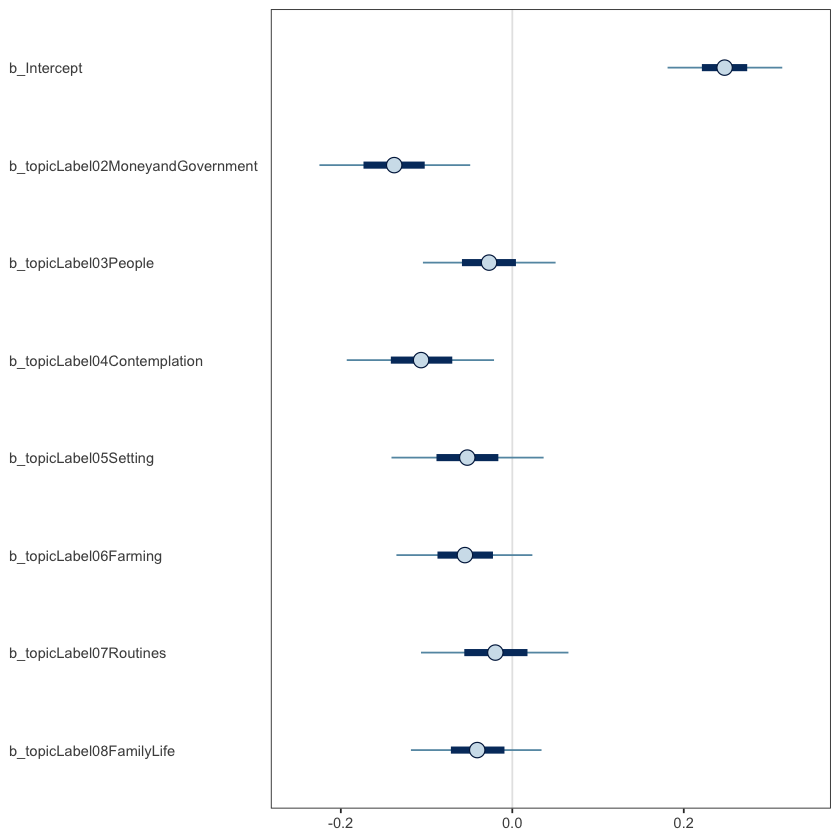

In [246]:
post <- as_draws_df(f1m)

mcmc_intervals(post[, 1:8], 
               point_est = "mean") +
  theme_bw() +
  theme(axis.text.y = element_text(hjust = 0),
        axis.ticks.y = element_blank(),
        panel.grid = element_blank())


In [308]:
nd <- distinct(df1, topicLabel)


f <- data.frame(fitted(f1m,
         newdata = nd,
         re_formula = NA,
         probs = c(.1, .90), 
         summary = F))

colnames(f) <- c("Correspondence", "People", "Setting", "Routines", "Contemplation", "Money and Government", "Family Life", "Farming")


Picking joint bandwidth of 0.00636

Saving 7 x 7 in image
Picking joint bandwidth of 0.00636



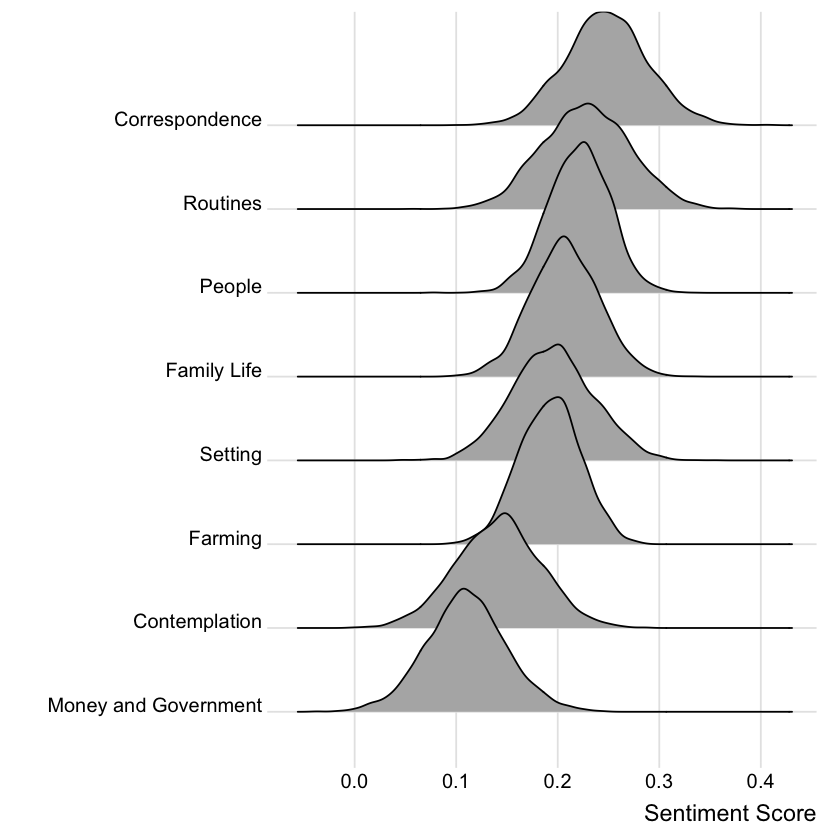

In [309]:
f <- f %>%                                   
  gather(variable, value)  

# Plot
ggplot(f, aes(x = value, y = reorder(variable, value))) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Sentiment Score") +
    ylab("")

ggsave("20240619_PhD_LtrSentTop.png")

In [310]:
fitted(f1m, newdata = nd, probs = c(.1,.9), re_formula = NA) %>%
as_tibble() %>%
bind_cols(nd) %>% 
arrange(desc(Estimate))

Estimate,Est.Error,Q10,Q90,topicLabel
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.2476214,0.04079101,0.19431876,0.3003004,01 Correspondence
0.2278370,0.04325981,0.17162664,0.2838802,07 Routines
0.2205130,0.03027976,0.18163219,0.2575721,03 People
0.2067153,0.03373681,0.16345687,0.2500843,08 Family Life
0.1951238,0.04035524,0.14395712,0.2482167,05 Setting
0.1923519,0.03007710,0.15358874,0.2306344,06 Farming
0.1412486,0.04220788,0.08677314,0.1951029,04 Contemplation
0.1098819,0.03972604,0.05968990,0.1604286,02 Money and Government


### Now clusters

In [12]:
f2m <- brm(
    formula= scoreCom ~ topicLabel + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrChkSenTop_02",
    control=list(adapt_delta=.99)
)

print(f2m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ topicLabel + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.13      0.01     0.11     0.16 1.01      992     1931

Regression Coefficients:
                           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                      0.15      0.03     0.10     0.20 1.00     1269
topicLabel02Money              0.02      0.03    -0.04     0.08 1.00     1967
topicLabel03Farming            0.07      0.03     0.01     0.13 1.00     1811
topicLabel04Correspondence     0.08      0.03     0.02     0.13 1.00     1844
topicLabel05People             0.03      0.03    -0.03     0.09 1.00     1738
topicLabel06Setting       

Warning message:
“Dropping 'draws_df' class as required metadata was removed.”


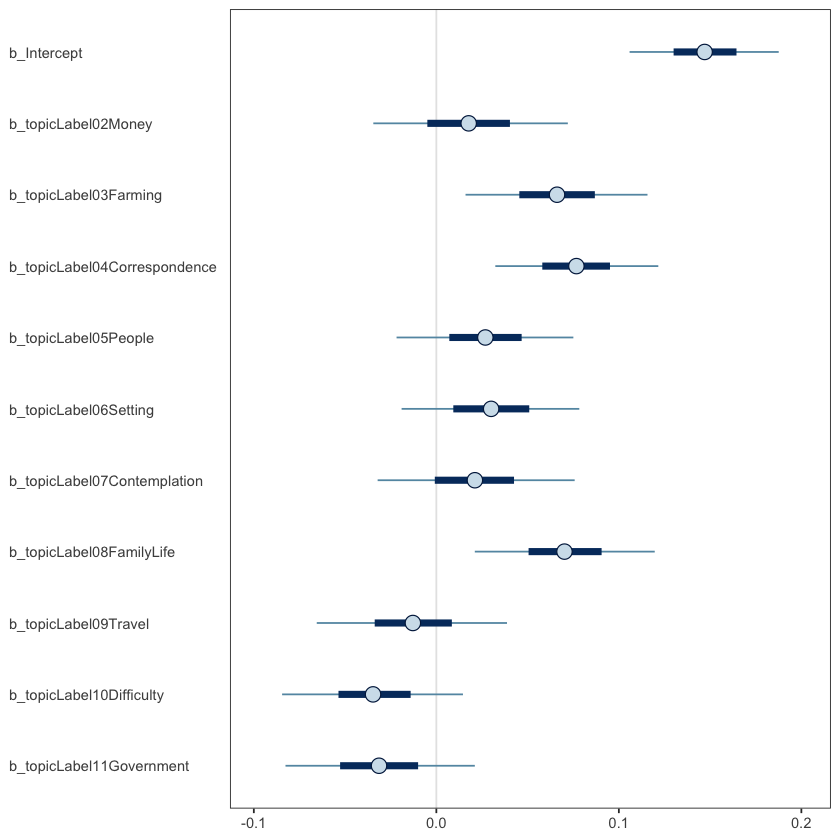

In [311]:
post <- as_draws_df(f2m)

mcmc_intervals(post[, 1:11], 
               point_est = "mean") +
  theme_bw() +
  theme(axis.text.y = element_text(hjust = 0),
        axis.ticks.y = element_blank(),
        panel.grid = element_blank())


In [312]:
nd <- distinct(df2, topicLabel)


f <- data.frame(fitted(f2m,
         newdata = nd,
         re_formula = NA,
         probs = c(.1, .90), 
         summary = F))

colnames(f) <- c("Correspondence", 
                 "People", 
                 "Weather", 
                 "Farming", 
                 "Setting", 
                 "Contemplation", 
                 "Travel", 
                 "Difficulty",
                 "Family Life",
                 "Government",
                 "Money")


Picking joint bandwidth of 0.0043

Saving 7 x 7 in image
Picking joint bandwidth of 0.0043



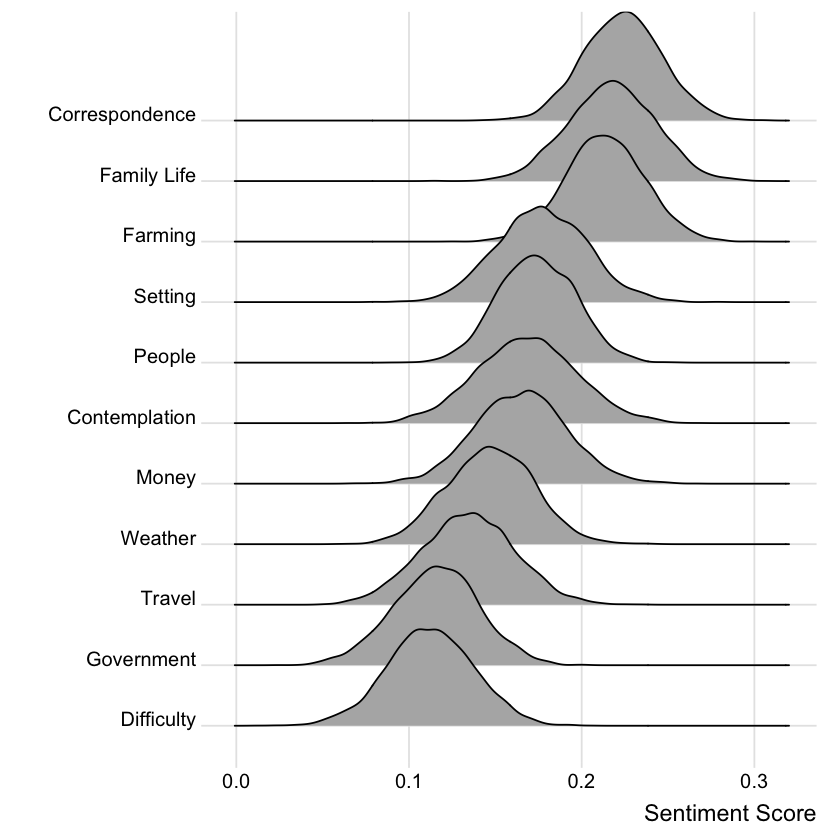

In [315]:
f <- f %>%                                   
  gather(variable, value)  

# Plot
ggplot(f, aes(x = value, y = reorder(variable, value))) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none") + 
xlab("Sentiment Score") +
    ylab("")

ggsave("20240619_PhD_LtrChkSentTop.png")

In [314]:
fitted(f2m, newdata = nd, probs = c(.1,.9), re_formula = NA) %>%
as_tibble() %>%
bind_cols(nd) %>% 
arrange(desc(Estimate))

Estimate,Est.Error,Q10,Q90,topicLabel
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.2237356,0.02268176,0.19541248,0.2523033,04 Correspondence
0.2172117,0.02507416,0.18441622,0.2492617,08 Family Life
0.2131314,0.02299519,0.18395562,0.2425463,03 Farming
0.1770263,0.02603598,0.14341496,0.2094020,06 Setting
0.1738516,0.02214193,0.14539456,0.2021625,05 People
0.1681177,0.02871915,0.13114499,0.2054038,07 Contemplation
0.1647215,0.02668957,0.13090147,0.1987246,02 Money
0.1470021,0.02515508,0.11425554,0.1781809,01 Weather
0.1341409,0.02706854,0.09896711,0.1690462,09 Travel


## Socials

In [386]:
f3m <- brm(
    formula= scoreCom ~ indsRate + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrSenInds_02",
    control=list(adapt_delta=.99)
)

print(f3m)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ indsRate + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.16      0.02     0.12     0.20 1.01      852     2250

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.14      0.02     0.09     0.19 1.00     3810     3378
indsRate      1.62      0.50     0.63     2.61 1.00     5065     3455

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.23      0.01     0.22     0.25 1.00     2948     3123

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures,

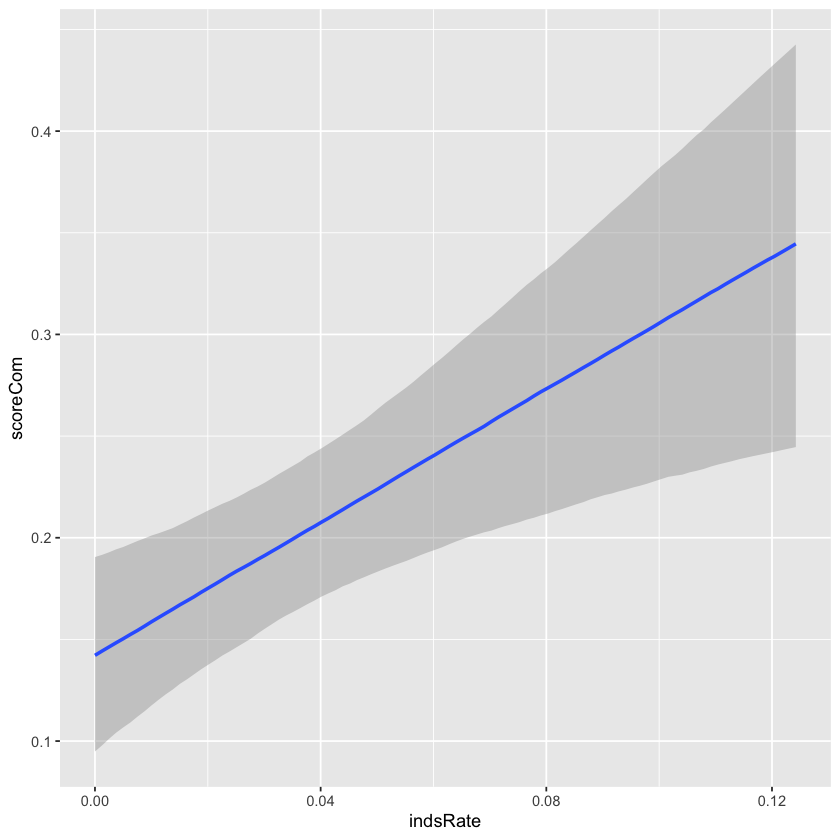

In [391]:
conditional_effects(f3m)

In [387]:
f4m <- brm(
    formula= scoreCom ~ fppAllRate + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrSenFPP_02",
    control=list(adapt_delta=.99)
)

print(f4m)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ fppAllRate + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.16      0.02     0.12     0.21 1.00      866     1793

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept      0.17      0.03     0.12     0.23 1.00     2735     3201
fppAllRate     0.65      0.58    -0.46     1.80 1.00     2946     2844

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.24      0.01     0.22     0.25 1.00     2506     2810

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size meas

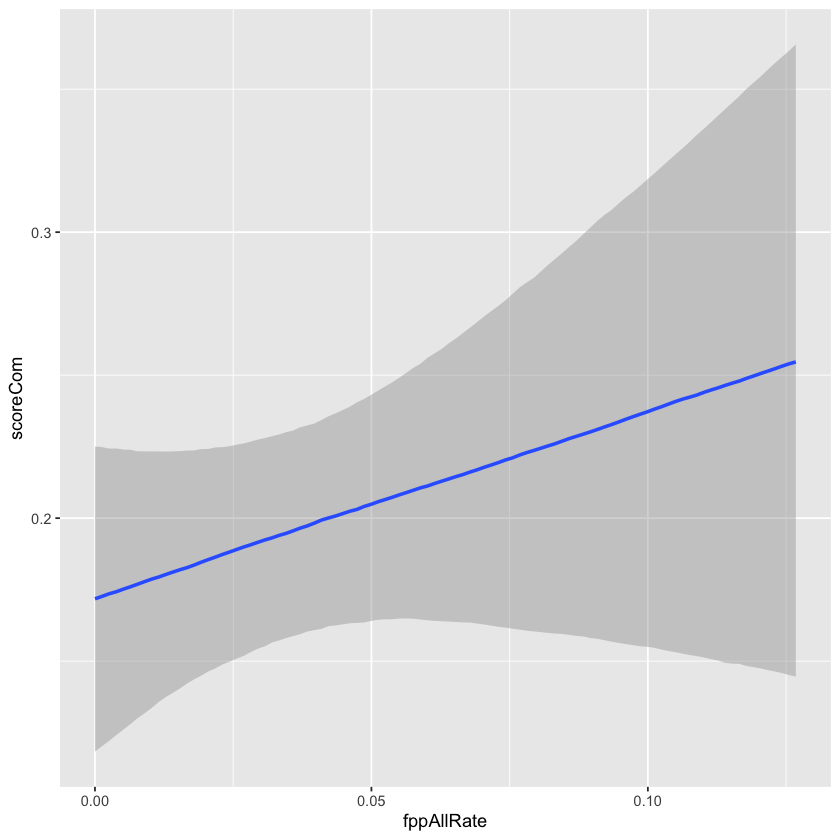

In [392]:
conditional_effects(f4m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ fppSubRate + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.16      0.02     0.12     0.21 1.00     1002     1912

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept      0.20      0.02     0.16     0.23 1.00     1673     2350
fppSubRate     0.52      0.66    -0.76     1.85 1.00     2834     2863

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.24      0.01     0.22     0.25 1.00     2775     2699

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size meas

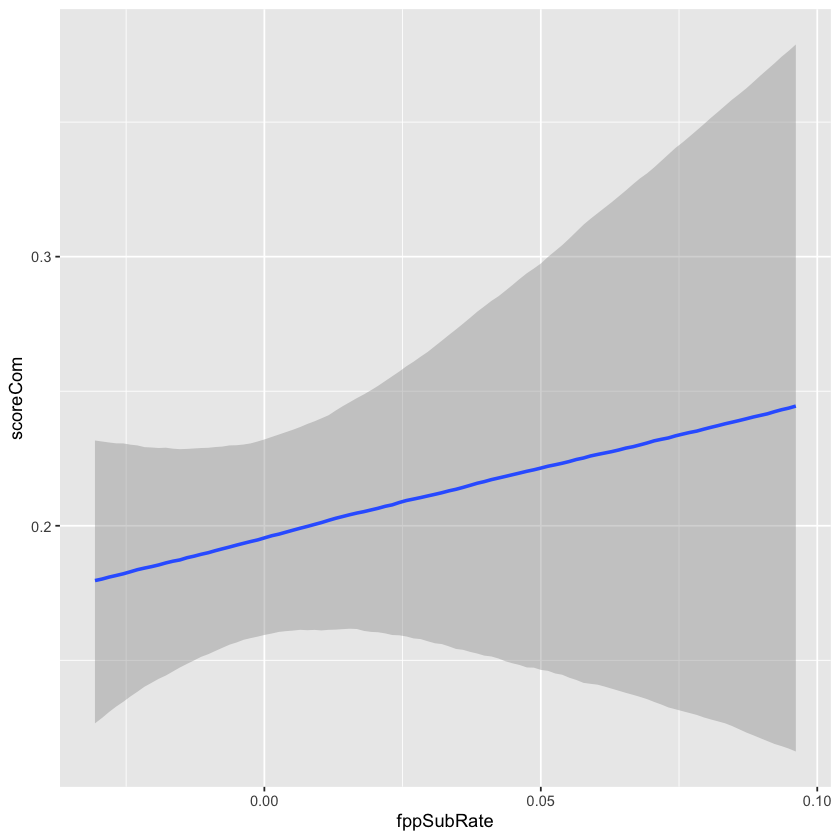

In [416]:
f4.1m <- brm(
    formula= scoreCom ~ fppSubRate + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrSenFPPSub_02",
    control=list(adapt_delta=.99)
)

print(f4.1m)

conditional_effects(f4.1m)

In [388]:
f5m <- brm(
    formula= scoreCom ~ mentsRate + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrChkSenMents_02",
    control=list(adapt_delta=.99)
)

print(f5m)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ mentsRate + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.13      0.01     0.10     0.16 1.00      876     1635

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.13      0.02     0.10     0.16 1.00     1593     2341
mentsRate     2.40      0.37     1.69     3.13 1.00     5408     3470

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.27      0.00     0.26     0.28 1.00     6260     2772

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measure

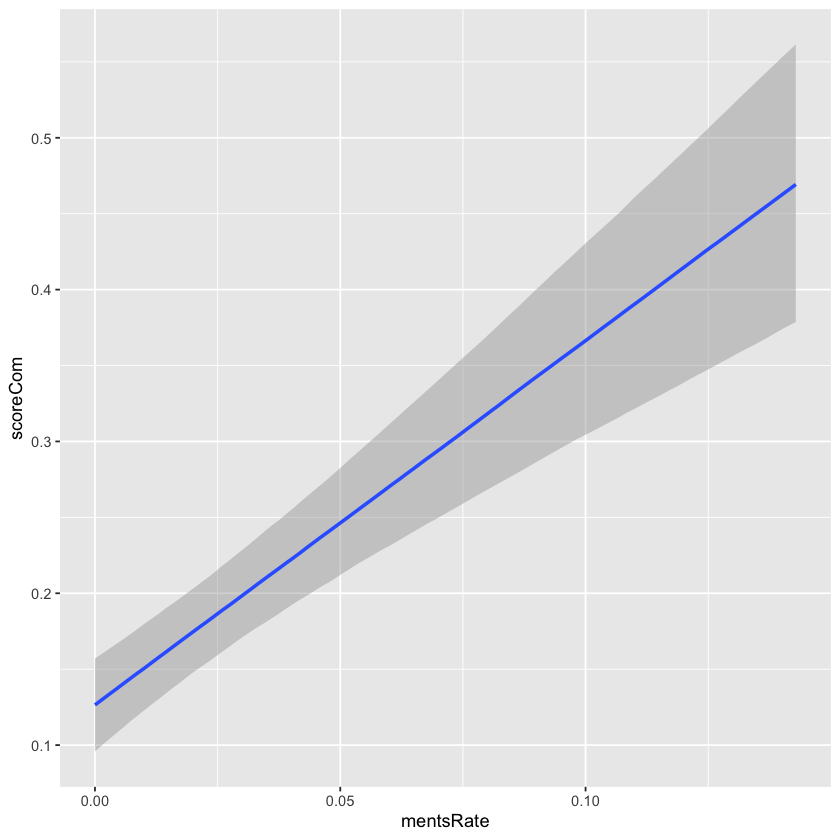

In [393]:
conditional_effects(f5m)

In [389]:
f6m <- brm(
    formula= scoreCom ~ fppAllRate + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrChkSenFPP_02",
    control=list(adapt_delta=.99)
)

print(f6m)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ fppAllRate + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.13      0.01     0.10     0.16 1.00     1049     1739

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept      0.12      0.02     0.09     0.16 1.00     1720     2283
fppAllRate     1.46      0.30     0.88     2.03 1.00     3473     3041

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.27      0.00     0.26     0.28 1.00     4989     3272

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size mea

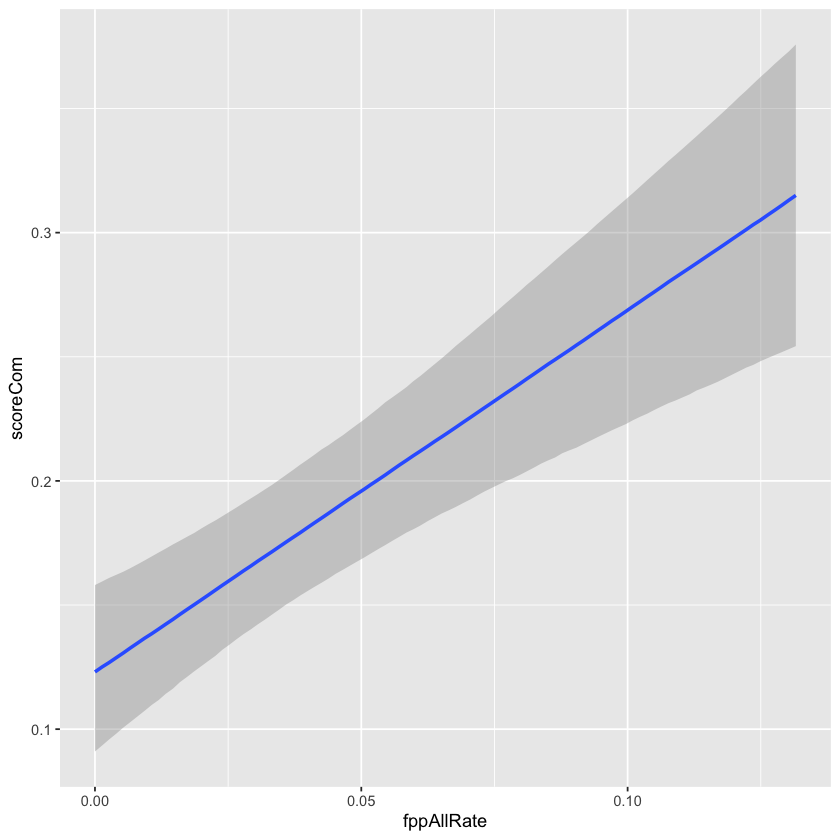

In [394]:
conditional_effects(f6m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ fppSubRate + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.13      0.01     0.10     0.16 1.00     1128     1911

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept      0.18      0.01     0.15     0.20 1.00     1379     2103
fppSubRate     1.59      0.35     0.89     2.26 1.00     5191     3337

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.27      0.00     0.26     0.28 1.00     5700     2745

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size mea

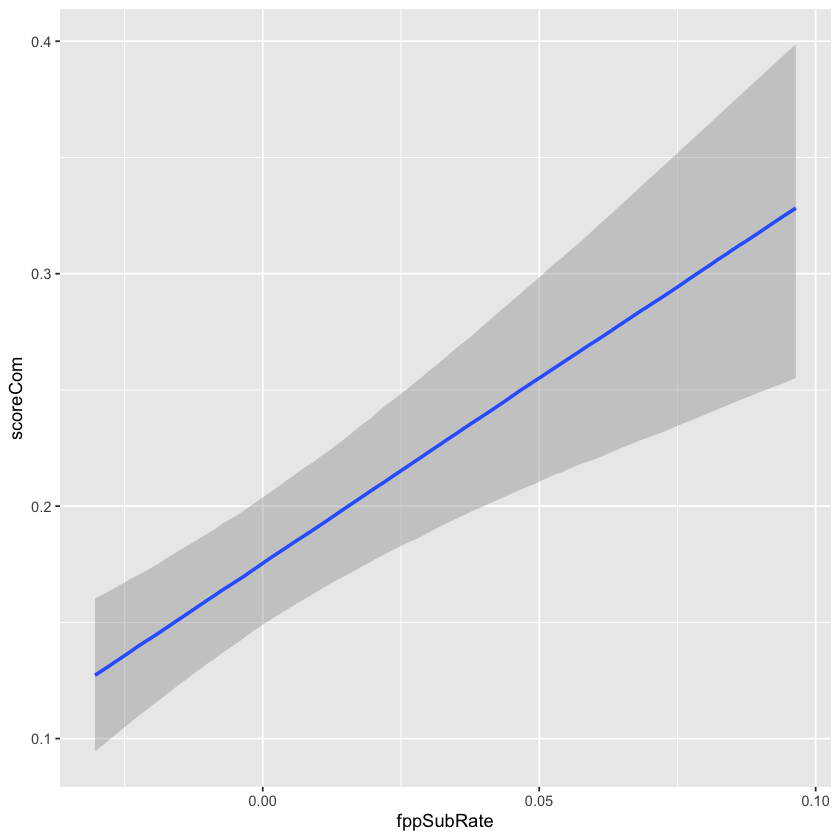

In [417]:
f6.1m <- brm(
    formula= scoreCom ~ fppSubRate + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrSenChkFPPSub_02",
    control=list(adapt_delta=.99)
)

print(f6.1m)

conditional_effects(f6.1m)

## Controls

### Gender

In [471]:
get_prior(data = df1, 
          family = gaussian,
          scoreCom ~ authorGender)

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,,default
,b,authorGenderM,,,,,,,default
"student_t(3, 0.1, 2.5)",Intercept,,,,,,,,default
"student_t(3, 0, 2.5)",sigma,,,,,,0,,default


In [21]:
## Single level for comparison

f7.0m <- brm(
    formula= scoreCom ~ authorGender,
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sigma", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    control=list(adapt_delta=.99)
)

print(f7.0m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ authorGender 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         0.15      0.01     0.13     0.18 1.00     2911     2449
authorGenderM     0.03      0.02    -0.02     0.07 1.00     2820     2298

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.27      0.01     0.26     0.29 1.00     2757     2450

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).


Saving 7 x 7 in image


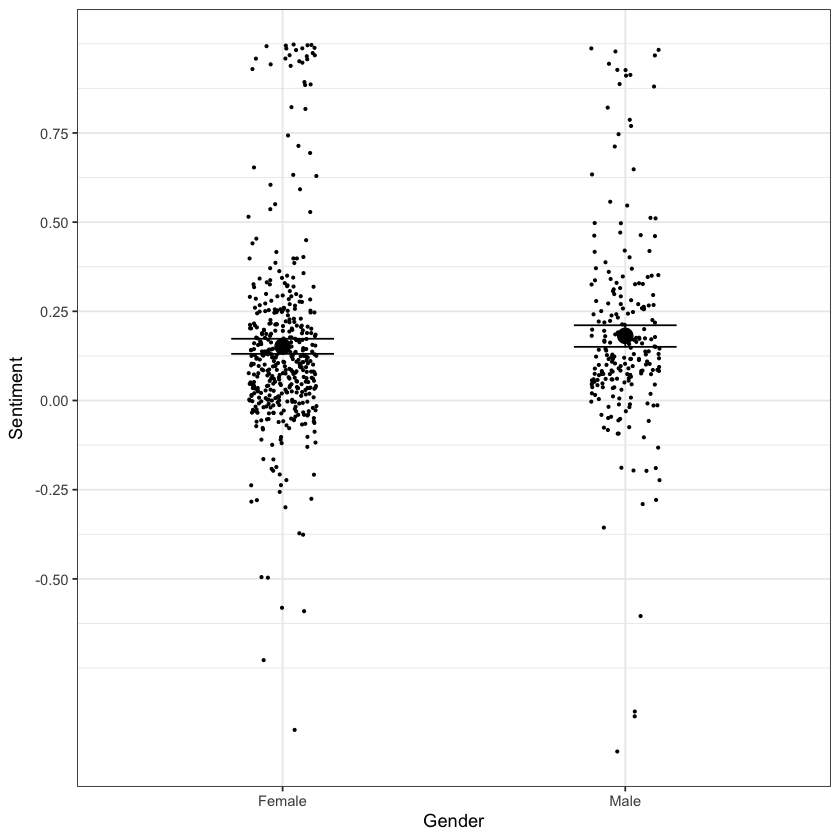

In [22]:
me <- conditional_effects(f7.0m, prob = .90)

plot(me, points = T,
       point_args = list(width = .1, size = .5), plot = FALSE)[[1]] +
  scale_color_grey() +
  scale_fill_grey() +
xlab("Gender") +
ylab("Sentiment") +
theme_bw()+
scale_x_discrete(breaks = c("M","F"),
    labels = c("Male","Female")
  ) +
scale_y_continuous(
    breaks = c(-.5, -.25, 0, .25, .5, .75)
  )

ggsave("20240619_PhD_sentGenderSingle.png")

In [17]:
f7m <- brm(
    formula= scoreCom ~ authorGender + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrSenGen_02",
    control=list(adapt_delta=.99)
)

print(f7m)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ authorGender + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.16      0.02     0.13     0.20 1.00      921     1695

Regression Coefficients:
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         0.23      0.03     0.18     0.28 1.01     1225     1933
authorGenderM    -0.07      0.04    -0.14     0.01 1.00     1692     2490

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.23      0.01     0.22     0.25 1.00     2883     2715

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sampl

Saving 7 x 7 in image


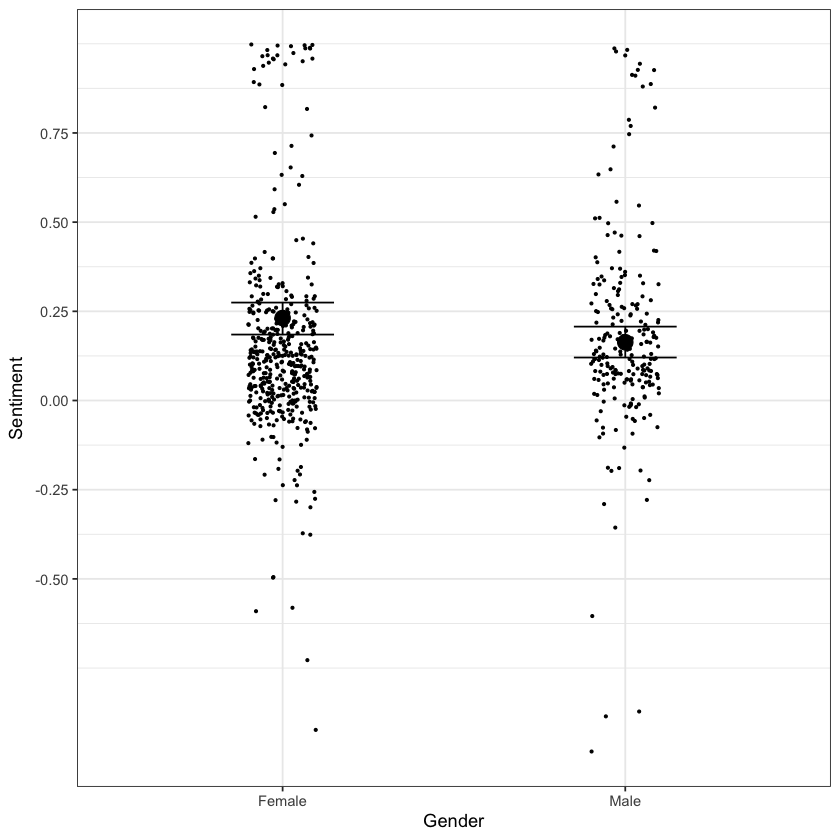

In [18]:
me <- conditional_effects(f7m, prob = .90)

plot(me, points = T,
       point_args = list(width = .1, size = .5), plot = FALSE)[[1]] +
  scale_color_grey() +
  scale_fill_grey() +
xlab("Gender") +
ylab("Sentiment") +
theme_bw()+
scale_x_discrete(breaks = c("M","F"),
    labels = c("Male","Female")
  ) +
scale_y_continuous(
    breaks = c(-.5, -.25, 0, .25, .5, .75)
  )

ggsave("20240619_PhD_sentGenderMulti.png")

Saving 7 x 7 in image


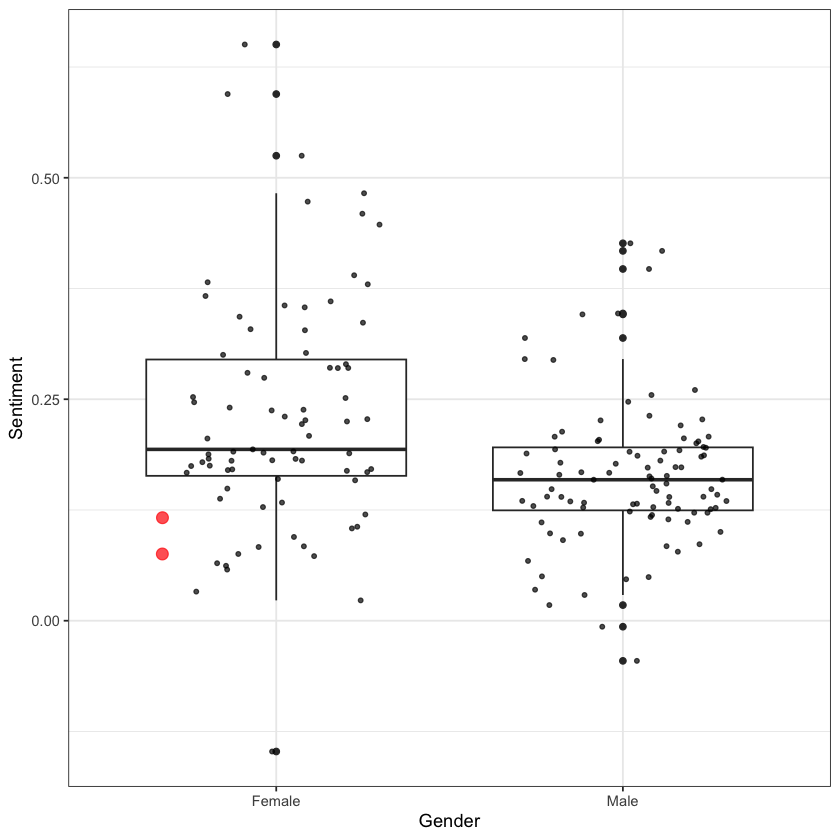

In [19]:
re  <- ranef(f7m, probs = .90)

randoms  <- data.frame(re[[1]][,1:3,])

data1 <- randoms                                           # Duplicate example data
data1$row_names <- row.names(data1)

women  <- df1%>%
filter(authorGender=="F") %>%
pull(docauthorid) %>%
unique()

men  <- df1%>%
filter(authorGender=="M") %>%
pull(docauthorid) %>%
unique()

femaleWriters <- data1[data1$row_names %in% women,]
maleWriters <- data1[data1$row_names %in% men,]
maleWriters$gender  <- "Male"
femaleWriters$gender  <- "Female"

fe <- fixef(f7m, probs = .90)

femaleWriters$intercept <- fe[1,1] + femaleWriters$Estimate 
maleWriters$intercept <- fe[1,1] + maleWriters$Estimate + fe[2,1]

plotRandoms  <- rbind(femaleWriters, maleWriters)

plotRandoms$gender  <- factor(plotRandoms$gender)

names(plotRandoms)[names(plotRandoms)=="gender"] <- "Gender"
names(plotRandoms)[names(plotRandoms)=="intercept"] <- "Sentiment"

highlight_df <- plotRandoms %>% 
             filter(row_names=="per0038009" | row_names=="per0004772")

plotRandoms %>% ggplot( aes(x=Gender, y=Sentiment)) +
    geom_boxplot() +
    theme_bw()+    
    geom_jitter(color="black", width=.3, size=1, alpha=0.7) +
geom_jitter(data=highlight_df, 
             aes(x=Gender,y=Sentiment), 
             color='red',
             size=3, alpha=0.7) 
ggsave("20240619_PhD_SentGenderRandoms.png")

In [23]:
f8m <- brm(
    formula= scoreCom ~ authorGender + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrChkSenGen_02",
    control=list(adapt_delta=.99)
)

print(f8m)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ authorGender + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.13      0.01     0.11     0.16 1.00     1115     2134

Regression Coefficients:
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         0.22      0.02     0.17     0.26 1.00     1318     1728
authorGenderM    -0.08      0.03    -0.13    -0.02 1.00     1654     2232

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.27      0.00     0.26     0.28 1.00     6039     2942

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective samp

Saving 7 x 7 in image


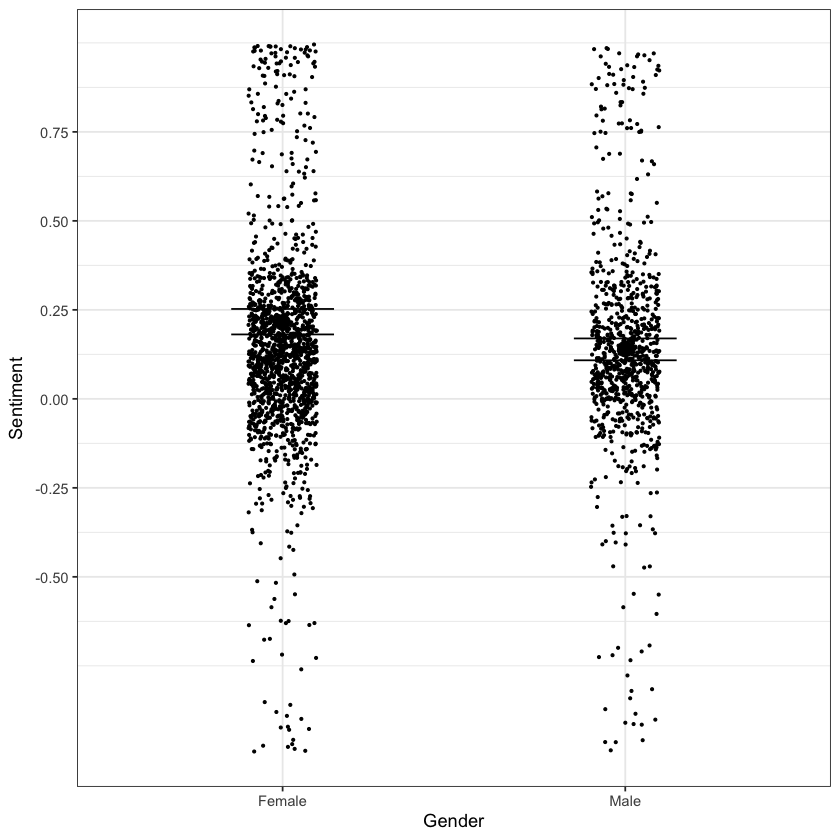

In [24]:
me <- conditional_effects(f8m, prob = .90)

plot(me, points = T,
       point_args = list(width = .1, size = .5), plot = FALSE)[[1]] +
  scale_color_grey() +
  scale_fill_grey() +
xlab("Gender") +
ylab("Sentiment") +
theme_bw()+
scale_x_discrete(breaks = c("M","F"),
    labels = c("Male","Female")
  ) +
scale_y_continuous(
    breaks = c(-.5, -.25, 0, .25, .5, .75)
  )

ggsave("20240619_PhD_sentChkGenderMulti.png")

Saving 7 x 7 in image


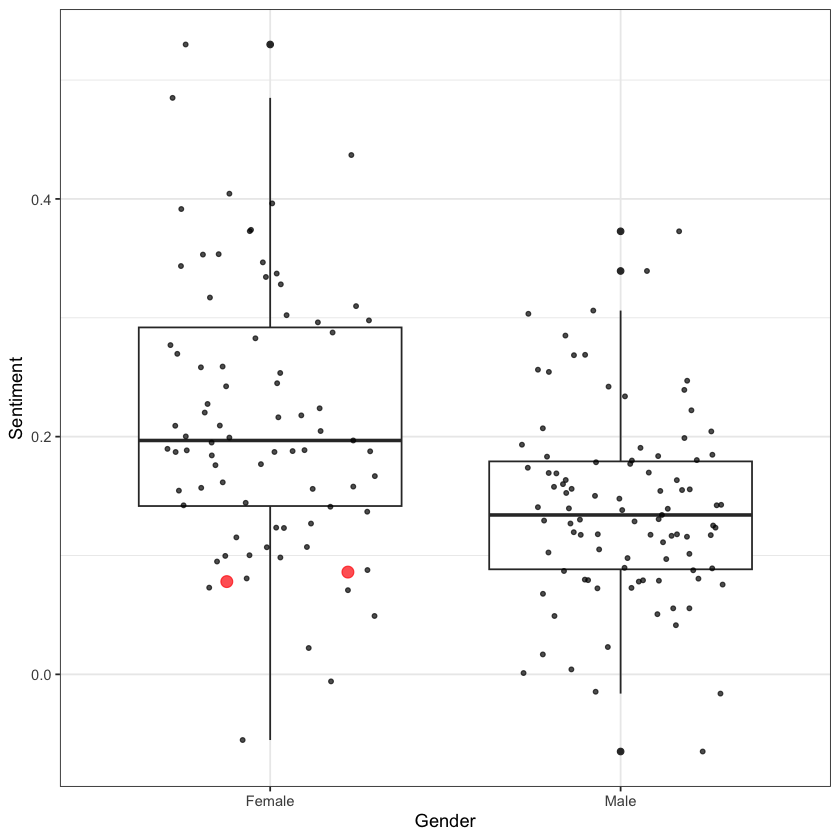

In [25]:
re  <- ranef(f8m, probs = .90)

randoms  <- data.frame(re[[1]][,1:3,])

data1 <- randoms                                           # Duplicate example data
data1$row_names <- row.names(data1)

women  <- df2%>%
filter(authorGender=="F") %>%
pull(docauthorid) %>%
unique()

men  <- df2%>%
filter(authorGender=="M") %>%
pull(docauthorid) %>%
unique()

femaleWriters <- data1[data1$row_names %in% women,]
maleWriters <- data1[data1$row_names %in% men,]
maleWriters$gender  <- "Male"
femaleWriters$gender  <- "Female"

fe <- fixef(f8m, probs = .90)

femaleWriters$intercept <- fe[1,1] + femaleWriters$Estimate 
maleWriters$intercept <- fe[1,1] + maleWriters$Estimate + fe[2,1]

plotRandoms  <- rbind(femaleWriters, maleWriters)

plotRandoms$gender  <- factor(plotRandoms$gender)

names(plotRandoms)[names(plotRandoms)=="gender"] <- "Gender"
names(plotRandoms)[names(plotRandoms)=="intercept"] <- "Sentiment"

highlight_df <- plotRandoms %>% 
             filter(row_names=="per0038009" | row_names=="per0004772")

plotRandoms %>% ggplot( aes(x=Gender, y=Sentiment)) +
    geom_boxplot() +
    theme_bw()+    
    geom_jitter(color="black", width=.3, size=1, alpha=0.7) +
geom_jitter(data=highlight_df, 
             aes(x=Gender,y=Sentiment), 
             color='red',
             size=3, alpha=0.7) 
ggsave("20240619_PhD_SentChkGenderRandoms.png")

In [431]:
f9m <- brm(
    formula= scoreCom ~ nationalOrigin + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_SentOrigin_02",
    control=list(adapt_delta=.99)
)

print(f9m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ nationalOrigin + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.13      0.02     0.09     0.17 1.01     1187     1841

Regression Coefficients:
                       Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                  0.13      0.04     0.06     0.20 1.00     1140
nationalOriginIrish        0.15      0.05     0.06     0.23 1.00     1323
nationalOriginScottish    -0.05      0.06    -0.17     0.07 1.00     1720
nationalOriginWelsh       -0.13      0.07    -0.26     0.00 1.00     1944
                       Tail_ESS
Intercept                  1665
nationalOriginIrish        2012
nationalOriginScottish   

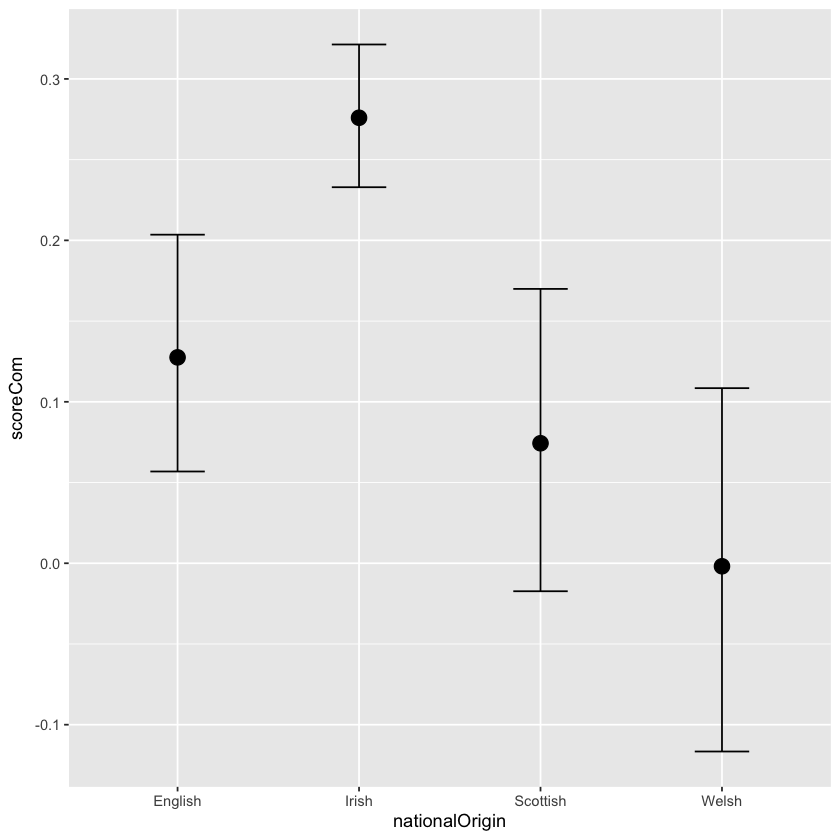

In [432]:
conditional_effects(f9m)

In [433]:
f10m <- brm(
    formula= scoreCom ~ nationalOrigin + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrChkSentOrigin_02",
    control=list(adapt_delta=.99)
)

print(f10m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ nationalOrigin + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.11      0.01     0.08     0.14 1.00     1319     2072

Regression Coefficients:
                       Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                  0.13      0.03     0.08     0.18 1.00     1452
nationalOriginIrish        0.11      0.03     0.05     0.17 1.00     1586
nationalOriginScottish    -0.05      0.04    -0.14     0.02 1.00     1664
nationalOriginWelsh       -0.13      0.05    -0.24    -0.03 1.00     2450
                       Tail_ESS
Intercept                  2114
nationalOriginIrish        2482
nationalOriginScottish  

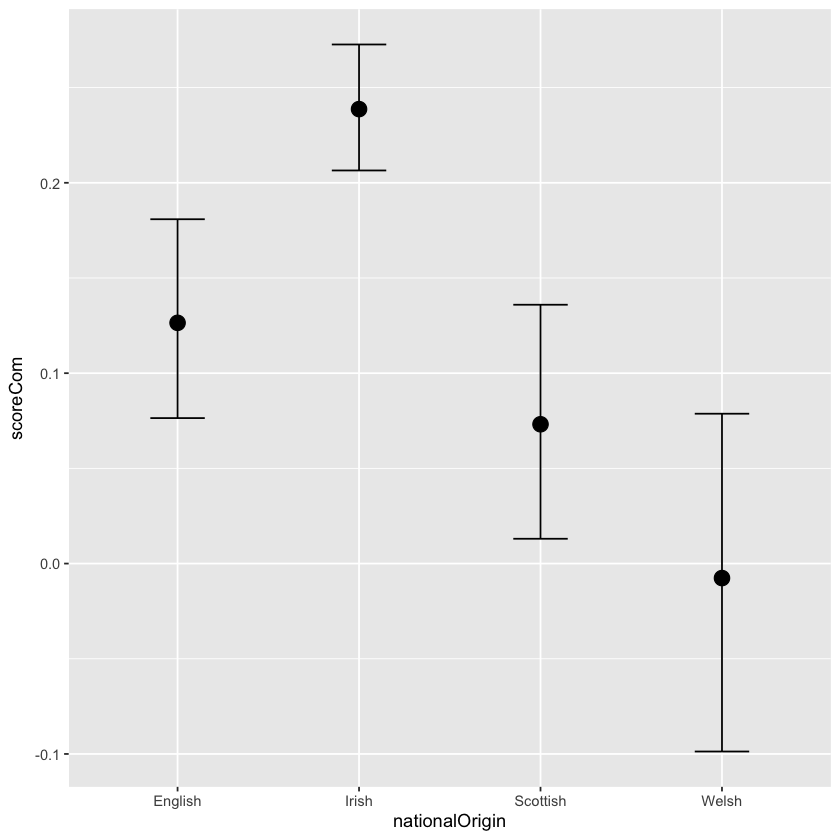

In [434]:
conditional_effects(f10m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ docyear + (1 | docauthorid) 
   Data: df1 (Number of observations: 676) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.17      0.02     0.13     0.21 1.00     1056     2291

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -1.42      1.20    -3.79     0.91 1.00     2608     2680
docyear       0.00      0.00    -0.00     0.00 1.00     2589     2664

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.23      0.01     0.22     0.25 1.00     2948     3086

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, 

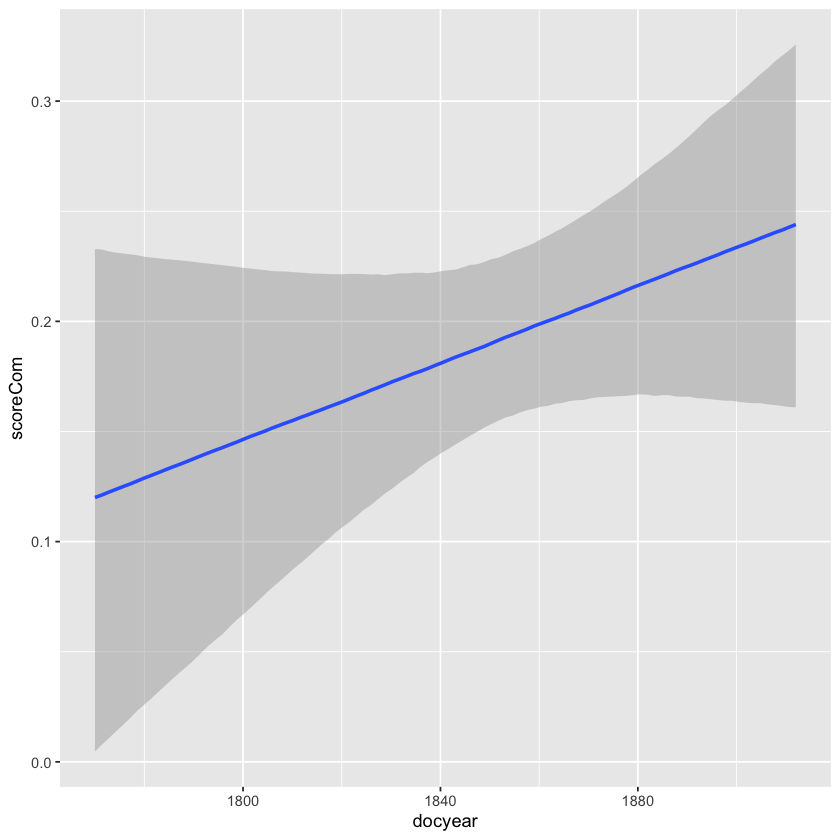

In [437]:
f11m <- brm(
    formula= scoreCom ~ docyear + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrSenYear_02",
    control=list(adapt_delta=.99)
)

print(f11m)

conditional_effects(f11m)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ docyear + (1 | docauthorid) 
   Data: df2 (Number of observations: 2392) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.14      0.01     0.11     0.17 1.00      980     1755

Regression Coefficients:
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -0.79      0.84    -2.49     0.81 1.00     2487     2599
docyear       0.00      0.00    -0.00     0.00 1.00     2475     2636

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.27      0.00     0.26     0.28 1.00     5908     3101

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures,

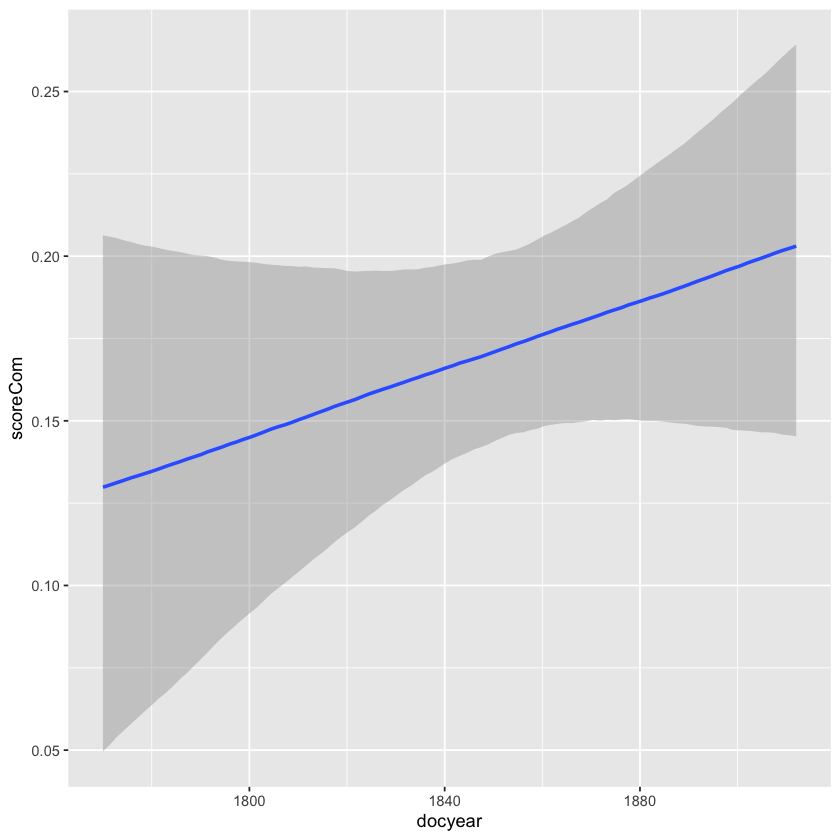

In [438]:
f12m <- brm(
    formula= scoreCom ~ docyear + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df2,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrChkSenYear_02",
    control=list(adapt_delta=.99)
)

print(f12m)

conditional_effects(f12m)

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ docmonth + (1 | docauthorid) 
   Data: df1 (Number of observations: 669) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.16      0.02     0.12     0.20 1.00      936     1896

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept      0.18      0.03     0.12     0.25 1.00     1252     2062
docmonth2      0.02      0.04    -0.07     0.11 1.00     1864     2733
docmonth3      0.02      0.05    -0.08     0.10 1.00     1966     2987
docmonth4      0.01      0.05    -0.08     0.11 1.00     1880     2192
docmonth5      0.04      0.04    -0.05     0.13 1.00     1753     3038
docmonth6      0.05      0.04    -0.04     0.14 1.00     1950     2404


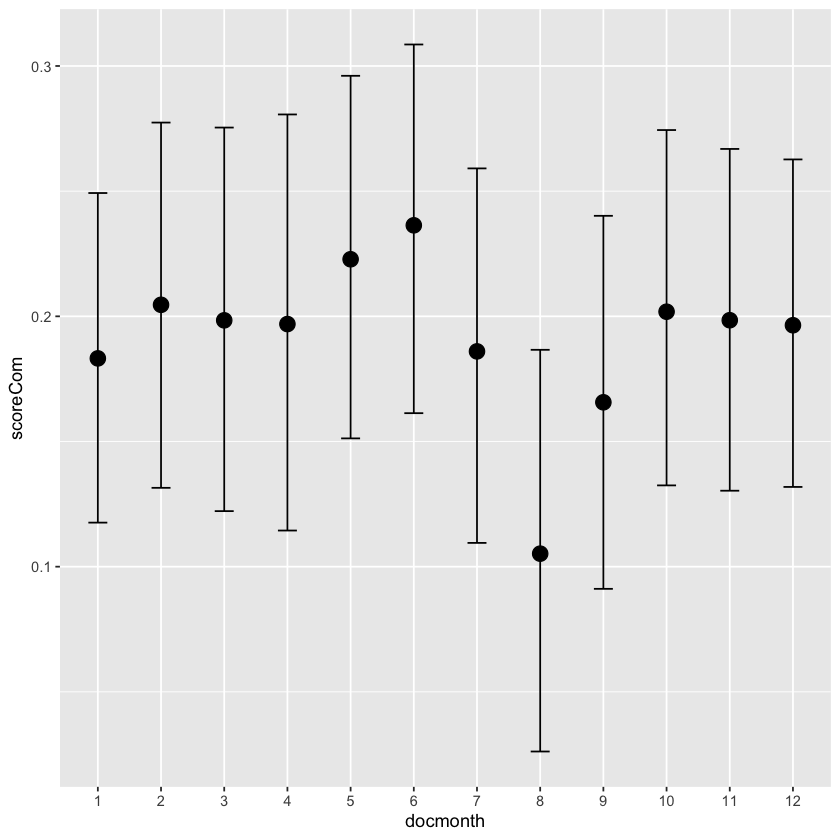

In [439]:
f13m <- brm(
    formula= scoreCom ~ docmonth + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrSenMonth_02",
    control=list(adapt_delta=.99)
)

print(f13m)

conditional_effects(f13m)

Warning message:
“Rows containing NAs were excluded from the model.”
Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: scoreCom ~ docmonth + (1 | docauthorid) 
   Data: df1 (Number of observations: 669) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~docauthorid (Number of levels: 174) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.16      0.02     0.12     0.20 1.00      936     1896

Regression Coefficients:
           Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept      0.18      0.03     0.12     0.25 1.00     1252     2062
docmonth2      0.02      0.04    -0.07     0.11 1.00     1864     2733
docmonth3      0.02      0.05    -0.08     0.10 1.00     1966     2987
docmonth4      0.01      0.05    -0.08     0.11 1.00     1880     2192
docmonth5      0.04      0.04    -0.05     0.13 1.00     1753     3038
docmonth6      0.05      0.04    -0.04     0.14 1.00     1950     2404


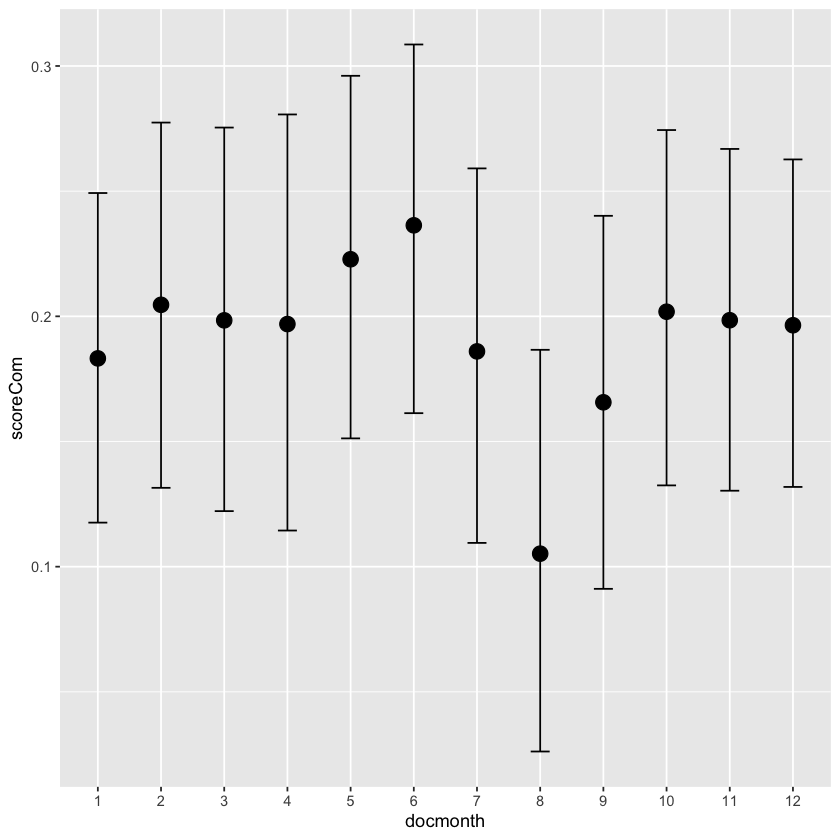

In [440]:
f14m <- brm(
    formula= scoreCom ~ docmonth + (1 | docauthorid),
    family = 'gaussian',
    prior=c(
        set_prior("normal(0,3)",class="Intercept"),
        set_prior("normal(0,3)",class='b'),
        set_prior("uniform(0,10)",class="sd", ub = 10)
    ),
    data=df1,
    chains=4, cores=4, iter=2000, warmup = 1000, seed = 4,
    file = "20240619_PhD_LtrChkSenMonth_02",
    control=list(adapt_delta=.99)
)

print(f14m)

conditional_effects(f14m)